# Prepare

In [ ]:
!pip install pydrive -q
!pip install jieba -q
!pip install underthesea -q
!pip install underthesea py_vncorenlp accelerate datasets evaluate -q
!pip install vncorenlp -q
!pip install nltk -q
# !pip install https://gitlab.com/trungtv/vi_spacy/-/raw/master/packages/vi_core_news_lg-3.6.0/dist/vi_core_news_lg-3.6.0.tar.gz
!pip install transformers -q
!pip install sentence-transformers -q
!pip install --upgrade gdown==4.6.3
from vncorenlp import VnCoreNLP
import py_vncorenlp
py_vncorenlp.download_model(save_dir='/content/')
vncorenlp_path = 'VnCoreNLP-1.2.jar'
vncorenlp = VnCoreNLP(vncorenlp_path)

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


# Download data

In [ ]:
!wget https://github.com/anvinhluong/Vietnamese-text-readability.git
!wget https://gist.githubusercontent.com/dauduathomngon/697ba153413f3da770d0e99ae5449850/raw/300288170c5794e36db1ba09ee16fb6f05978dbd/dia_vi_vocab.txt
!wget https://gist.githubusercontent.com/dauduathomngon/aeee16a77e120973b6e184f3385451d5/raw/524ad78818184503feb47678567afd8cdc72e6c4/sino-vi_vocab.txt

--2024-01-21 03:43:30--  https://github.com/anvinhluong/Vietnamese-text-readability.git
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/anvinhluong/Vietnamese-text-readability [following]
--2024-01-21 03:43:30--  https://github.com/anvinhluong/Vietnamese-text-readability
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Vietnamese-text-readability.git’

Vietnamese-text-rea     [ <=>                ] 148.06K   810KB/s    in 0.2s    

2024-01-21 03:43:31 (810 KB/s) - ‘Vietnamese-text-readability.git’ saved [151615]

--2024-01-21 03:43:31--  https://gist.githubusercontent.com/dauduathomngon/697ba153413f3da770d0e99ae5449850/raw/300288170c5794e36db1ba09ee16fb6f05978dbd/dia_vi_vocab.txt
Resolving gist.githubusercontent.com (gist.githubuserconten

In [ ]:
# https://drive.google.com/file/d/15uyTNJR2Sua5zRtjOOcTGr3H1AczdfQT/view?usp=sharing
# https://drive.google.com/file/d/15FJWDZOKJfOGCTbKfIITX5TJ_aJ64Zm_/view?usp=sharing
# https://drive.google.com/file/d/1oOJv2XuvO-GLaDu5jEqe2ucfx6ifRC1p/view?usp=sharing
# https://drive.google.com/file/d/1Gs4Tgp2i0uTVp9HIl9_JJY-RFkuFJnYG/view?usp=drive_link
# https://drive.google.com/file/d/1j8HzIw5MtI0fUwp2O01RncdjAVT_NUEO/view?usp=drive_link

!gdown '15uyTNJR2Sua5zRtjOOcTGr3H1AczdfQT'
!gdown '15FJWDZOKJfOGCTbKfIITX5TJ_aJ64Zm_'
!gdown '1oOJv2XuvO-GLaDu5jEqe2ucfx6ifRC1p'
!gdown '1Gs4Tgp2i0uTVp9HIl9_JJY-RFkuFJnYG'
!gdown '1j8HzIw5MtI0fUwp2O01RncdjAVT_NUEO'

Downloading...
From: https://drive.google.com/uc?id=15uyTNJR2Sua5zRtjOOcTGr3H1AczdfQT
To: /content/checkpoint_mach_lach.pt
100% 540M/540M [00:06<00:00, 79.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=15FJWDZOKJfOGCTbKfIITX5TJ_aJ64Zm_
To: /content/data_segment.csv
100% 39.8M/39.8M [00:00<00:00, 84.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oOJv2XuvO-GLaDu5jEqe2ucfx6ifRC1p
To: /content/data_feature_Luong.csv
100% 60.3M/60.3M [00:00<00:00, 87.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Gs4Tgp2i0uTVp9HIl9_JJY-RFkuFJnYG
To: /content/data_RACE.csv
100% 175M/175M [00:04<00:00, 42.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1j8HzIw5MtI0fUwp2O01RncdjAVT_NUEO
To: /content/data_feature_OneStopEng.csv
100% 9.85M/9.85M [00:00<00:00, 49.0MB/s]


In [ ]:
import zipfile
import urllib.request
from pathlib import Path
def download_dataset():
  path = Path("/vi_readability_corpus.zip")
  if not path.is_file():
    url = "https://github.com/anvinhluong/Vietnamese-text-readability/raw/master/Vietnamese%20Text%20Readability%20Corpus.zip"
    urllib.request.urlretrieve(url, path)
    with zipfile.ZipFile(path, 'r') as corpus_ref:
      corpus_ref.extractall("/")

In [ ]:
import pandas as pd
import re

def corpus_build(DIFF_DICT:list[str]):
  path = Path("/Vietnamese Text Readability Corpus")

  data = []
  label = []
  num = []

  for txt_file in path.glob("*.txt"):
    with open(txt_file, "r") as file:
      data.append(file.read())
      label.append(DIFF_DICT[re.split("[/_.]", txt_file.name)[0]])
      num.append(re.split("[/_.]", txt_file.name)[1])

  return pd.DataFrame(data = {"document": data, "labels": label})

In [ ]:
download_dataset()

In [ ]:
DIFF_DICT = {"veryeasy": 0, "easy": 1, "medium": 2, "difficult": 3}
data = corpus_build(DIFF_DICT)

In [ ]:
data

,document,labels
0,Sinh thái học tinh thần và những gợi dẫn cho n...,3
1,Đặc điểm nghệ thuật của một số tác phẩm văn xu...,3
2,Bàn tay dịu dàng\nBà của An mới mất nên An xin...,0
3,Báo gấm suýt ngã\nCó một con báo gấm con không...,0
4,Mùa hè bắt đầu từ tháng tư trong năm .\nMặt tr...,0
...,...,...
1820,Chú thỏ tinh khôn\nCó một lần Thỏ đến bên bờ s...,0
1821,Nợ duyên trong mộng\nNgày xưa ở động Sơn-la th...,2
1822,"Mùa Giáng sinh , nghĩ về sự phục sinh của trườ...",3
1823,Anh Roland yêu dấu\nNgày xưa có một người đàn ...,1


In [ ]:
import pandas as pd
data = pd.read_csv('data_RACE.csv')

# Static

In [ ]:
import pandas as pd
data_luong = pd.read_csv('data_feature_Luong.csv')
data_race = pd.read_csv('data_RACE.csv')
data_one = pd.read_csv('data_feature_OneStopEng.csv')

In [ ]:
data_race['ratio_of_borrowed_words'] = data_race['num_of_borrow_word']/data_race['count_word_in_paragraph']
data_race['ratio_of_common_nouns'] = data_race['pos_common_noun_word']/data_race['count_word_in_paragraph']
data_race['ratio_of_parallel'] = data_race['parallel_conjunction']/data_race['count_word_in_paragraph']

data_luong['ratio_of_borrowed_words'] = data_luong['num_of_borrow_word']/data_luong['count_word_in_paragraph']
data_luong['ratio_of_common_nouns'] = data_luong['pos_common_noun_word']/data_luong['count_word_in_paragraph']
data_luong['ratio_of_parallel'] = data_luong['parallel_conjunction']/data_luong['count_word_in_paragraph']

data_one['ratio_of_borrowed_words'] = data_one['num_of_borrow_word']/data_one['count_word_in_paragraph']
data_one['ratio_of_common_nouns'] = data_one['pos_common_noun_word']/data_one['count_word_in_paragraph']
data_one['ratio_of_parallel'] = data_one['parallel_conjunction']/data_one['count_word_in_paragraph']







In [ ]:
# prompt: thống kê data_luong

data_race.describe()


,parallel_conjunction,num_of_distinct_borrow_word,average_length_sentence,average_word_length,ratio_of_long_sentences,average_deep_of_dependence,pos_conjunction,pos_common_noun_word,pos_common_adverb_word,ratio_of_single_pos,count_word_in_paragraph,ratio_of_distinct_borrow_word,pos_conjunction_non_distinct,num_of_borrow_word,count_tokens_in_paragraph,percent_sinos,average_overlapping,ratio_of_borrowed_words,ratio_of_common_nouns,ratio_of_parallel
count,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000,25101.000000
mean,6.804271,0.261703,20.923495,3.141998,0.428557,9.101530,6.804271,63.851679,12.506474,0.947413,296.996215,0.000917,15.449942,0.398550,375.457631,0.218361,2.656625,0.001375,0.218641,0.023551
std,2.835330,0.587040,7.987145,0.149724,0.248748,3.464614,2.835330,21.552222,4.572759,0.023161,101.762064,0.002219,7.391430,1.153289,132.280437,0.047964,0.928794,0.004014,0.043023,0.008944
min,0.000000,0.000000,2.000000,2.287081,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,15.777778,3.055655,0.230769,6.812500,5.000000,49.000000,10.000000,0.936975,237.000000,0.000000,10.000000,0.000000,297.000000,0.186709,2.052154,0.000000,0.189474,0.017544
50%,7.000000,0.000000,20.125000,3.154150,0.428571,8.666667,7.000000,64.000000,13.000000,0.948187,300.000000,0.000000,15.000000,0.000000,381.000000,0.219048,2.561282,0.000000,0.216667,0.022951
75%,9.000000,0.000000,25.176471,3.239411,0.615385,10.888889,9.000000,78.000000,15.000000,0.959108,352.000000,0.000000,20.000000,0.000000,449.000000,0.250755,3.155140,0.000000,0.245370,0.028761
max,18.000000,7.000000,432.000000,5.483660,1.000000,132.000000,18.000000,190.000000,39.000000,1.000000,1271.000000,0.044118,79.000000,24.000000,1587.000000,0.396122,11.157478,0.058824,0.500000,0.173913


In [ ]:
data_one['average_overlapping'].describe()

count    567.000000
mean       5.166696
std        1.301145
min        1.659030
25%        4.346177
50%        5.047688
75%        5.936358
max       10.566435
Name: average_overlapping, dtype: float64

In [ ]:
data_luong

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,document,labels,document_segment,smooth,parallel_conjunction,num_of_distinct_borrow_word,...,pos_common_adverb_word,ratio_of_single_pos,count_word_in_paragraph,num_of_borrow_word,ratio_of_borrow_word,ratio_of_distinct_borrow_word,average_overlapping,percent_distinct_sinos,pos_conjunction_non_distinct,document_list
0,0,0,0,0,Ngậm ngải tìm trầm hay là sự tích núi Mẫu tử\n...,1,['Ngậm ngải tìm trầm hay_là sự_tích núi Mẫu_tử...,1,16,0,...,38,0.916974,1167,0,0.00000,0.000000,6.632466,0.003428,50,['Ngậm ngải tìm trầm hay là sự tích núi Mẫu tử...
1,1,1,1,1,"Cân voi\nMột lần , sứ thần Trung Hoa thử tài L...",0,"['Cân voi Một lần , sứ_thần Trung_Hoa thử tài ...",1,1,0,...,1,0.938776,57,0,0.00000,0.000000,0.838928,0.035088,2,"['Cân voi\nMột lần , sứ thần Trung Hoa thử tài..."
2,2,2,2,2,Văn bản - liên văn bản - lý thuyết liên văn bả...,3,['Văn_bản - liên văn_bản - lý_thuyết liên văn_...,1,32,3,...,52,0.825921,11748,4,0.00034,0.000255,57.348424,0.000340,602,['Văn bản - liên văn bản - lý thuyết liên văn ...
3,3,3,3,3,Chú sẻ và bông hoa bằng lăng\nỞ gần tổ của một...,0,['Chú sẻ và bông hoa bằng_lăng Ở gần tổ của mộ...,1,7,0,...,8,0.938053,163,0,0.00000,0.000000,2.783223,0.018405,8,['Chú sẻ và bông hoa bằng lăng\nỞ gần tổ của m...
4,4,4,4,4,Gà Tía\nXóm tôi có một anh gà chọi rất hung hă...,1,['Gà Tía_Xóm tôi có một anh gà_chọi rất hung_h...,1,18,0,...,34,0.910134,1101,0,0.00000,0.000000,9.285877,0.003633,63,['Gà Tía\nXóm tôi có một anh gà chọi rất hung ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1820,1820,1820,1820,"Con thần mã\nNgày xưa , có một khu rừng đen , ...",2,"['Con thần mã Ngày_xưa , có một khu rừng đen ,...",1,12,0,...,63,0.886388,3167,0,0.00000,0.000000,18.643590,0.001263,90,"['Con thần mã\nNgày xưa , có một khu rừng đen ..."
1821,1821,1821,1821,1821,"Chim ưng thần\nNgày xưa , có một ông vua trị v...",2,"['Chim ưng thần Ngày_xưa , có một ông vua trị_...",1,20,0,...,48,0.880315,2693,0,0.00000,0.000000,17.875759,0.001485,158,"['Chim ưng thần\nNgày xưa , có một ông vua trị..."
1822,1822,1822,1822,1822,Một buổi thi\n- Hai mươi sáu : Trần Hồng Linh ...,1,['Một buổi thi - Hai_mươi sáu : Trần_Hồng_Linh...,1,11,0,...,30,0.934884,784,0,0.00000,0.000000,6.124199,0.005102,30,['Một buổi thi\n- Hai mươi sáu : Trần Hồng Lin...
1823,1823,1823,1823,1823,Chó nằm trên đồng cỏ khô\nChó nằm trên đồng cỏ...,0,['Chó nằm trên đồng_cỏ khô Chó nằm trên đồng_c...,1,4,0,...,6,0.905660,62,0,0.00000,0.000000,0.478688,0.048387,6,['Chó nằm trên đồng cỏ khô\nChó nằm trên đồng ...


from matplotlib import pyplot as plt
data_luong['Unnamed: 0.3'].plot(kind='hist', bins=20, title='Unnamed: 0.3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_luong['Unnamed: 0.2'].plot(kind='hist', bins=20, title='Unnamed: 0.2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_luong['Unnamed: 0.1'].plot(kind='hist', bins=20, title='Unnamed: 0.1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_luong['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_luong.plot(kind='scatter', x='Unnamed: 0.3', y='Unnamed: 0.2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_luong.plot(kind='scatter', x='Unnamed: 0.2', y='Unnamed: 0.1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_luong.plot(kind='scatter', x='Unnamed: 0.1', y='Unnamed: 0', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data_luong.plot(kind='scatter', x='Unnamed: 0', y='labels', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0.3']
  ys = series['labels']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_luong.sort_values('Unnamed: 0.3', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0.3')
_ = plt.ylabel('labels')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0.3']
  ys = series['smooth']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_luong.sort_values('Unnamed: 0.3', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0.3')
_ = plt.ylabel('smooth')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0.3']
  ys = series['parallel_conjunction']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_luong.sort_values('Unnamed: 0.3', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0.3')
_ = plt.ylabel('parallel_conjunction')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0.3']
  ys = series['num_of_distinct_borrow_word']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data_luong.sort_values('Unnamed: 0.3', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0.3')
_ = plt.ylabel('num_of_distinct_borrow_word')

from matplotlib import pyplot as plt
data_luong['Unnamed: 0.3'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0.3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_luong['Unnamed: 0.2'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0.2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_luong['Unnamed: 0.1'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0.1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data_luong['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

# EDA

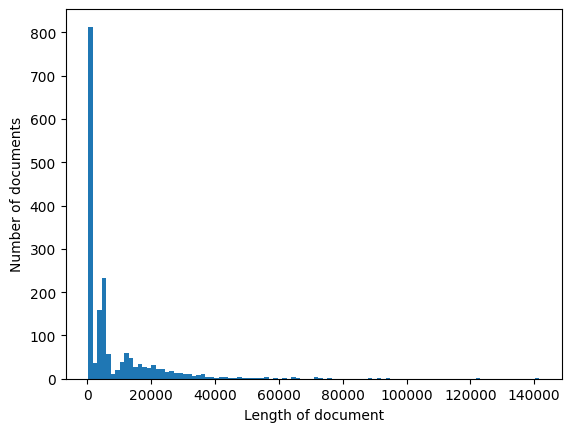

In [ ]:
# prompt: plot distribution of len of column document

import matplotlib.pyplot as plt
plt.hist(data["document"].str.len(), bins=100)
plt.xlabel("Length of document")
plt.ylabel("Number of documents")
plt.show()


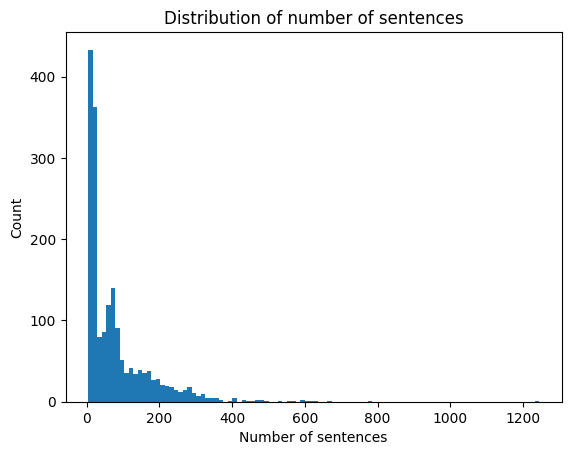

In [ ]:
# prompt: plot distribution of number of sentence of column document

import matplotlib.pyplot as plt
data['num_sentence'] = data['document'].apply(lambda x: len(re.split('\n', x)))
plt.hist(data['num_sentence'], bins=100)
plt.xlabel('Number of sentences')
plt.ylabel('Count')
plt.title('Distribution of number of sentences')
plt.show()


#Preprocessing

In [ ]:
annotate = py_vncorenlp.VnCoreNLP(annotators=["wseg", "pos", "ner", "parse"], save_dir='/content/')

In [ ]:
data['document_segment'] = data['document'].apply(lambda x: annotate.word_segment(x))

In [ ]:
data

In [ ]:
data.to_csv('data_segment.csv')

# Extract Feature


In [ ]:
import pandas as pd
data = pd.read_csv('/content/data_segment.csv')

In [ ]:
import ast
def chuoi_sang_mang(chuoi):
    try:
        mang = ast.literal_eval(chuoi)
        if isinstance(mang, list):
            return mang
        else:
            raise ValueError("Chuỗi không biểu diễn một danh sách.")
    except (ValueError, SyntaxError) as e:
        print(f"Lỗi: {e}")
        return None

data['document_segment'] = data['document_segment'].apply(lambda x: chuoi_sang_mang(x))

In [ ]:
data

,ví dụ_id,bài báo,document_segment,parallel_conjunction,num_of_distinct_borrow_word,average_length_sentence,average_word_length,ratio_of_long_sentences,average_deep_of_dependence,pos_conjunction,...,pos_common_adverb_word,ratio_of_single_pos,count_word_in_paragraph,ratio_of_distinct_borrow_word,pos_conjunction_non_distinct,num_of_borrow_word,bai_bao_list,count_tokens_in_paragraph,percent_sinos,average_overlapping
0,người lớn tuổi,Nhiều người có xu hướng phàn nàn về việc không...,[Nhiều người có xu_hướng phàn_nàn về việc khôn...,9,0,20.150000,3.217090,0.400000,8.650000,9,...,20,0.931373,320,0.0,23,0,['Nhiều người có xu hướng phàn nàn về việc khô...,402,0.212500,2.707057
1,người lớn tuổi,"John Steinbeck từng nói: ""Tất cả người Mỹ đều ...","[John_Steinbeck từng nói : "" Tất_cả người Mỹ đ...",12,0,24.105263,3.193548,0.526316,10.631579,12,...,21,0.952756,384,0.0,27,0,"['John Steinbeck từng nói: ""Tất cả người Mỹ đề...",457,0.236979,3.307867
2,người lớn tuổi,"Vào ngày 11 tháng 10, NASCAR đã công bố chiếc ...","[Vào ngày 11 tháng 10 , NASCAR đã công_bố chiế...",7,0,28.058824,3.216797,0.705882,10.882353,7,...,20,0.947368,348,0.0,20,0,"['Vào ngày 11 tháng 10, NASCAR đã công bố chiế...",477,0.235632,2.727616
3,người lớn tuổi,Người ta chưa biết con người lần đầu tiên học ...,[Người ta chưa biết con_người lần đầu_tiên học...,9,0,34.636364,3.070905,0.818182,13.090909,9,...,13,0.930070,272,0.0,20,0,['Người ta chưa biết con người lần đầu tiên họ...,379,0.286765,2.308853
4,người lớn tuổi,"Vào một ngày hè, John đang ngồi trên bãi biển ...","[Vào một ngày hè , John đang ngồi trên bãi biể...",6,0,19.500000,3.089710,0.444444,8.941176,6,...,12,0.951087,287,0.0,14,0,"['Vào một ngày hè, John đang ngồi trên bãi biể...",351,0.142857,2.994380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25096,người lớn tuổi,"Cho đến cuối thế kỷ 20, hầu hết người Mỹ đều d...","[Cho đến cuối thế_kỷ 20 , hầu_hết người Mỹ đều...",9,0,17.740741,3.136882,0.259259,7.074074,9,...,18,0.945255,387,0.0,19,0,"['Cho đến cuối thế kỷ 20, hầu hết người Mỹ đều...",479,0.242894,3.333012
25097,người lớn tuổi,Lần đầu tiên tôi biết đến khái niệm quán cà ph...,[Lần đầu_tiên tôi biết đến khái_niệm quán cà_p...,9,0,26.555556,3.225621,0.722222,11.823529,9,...,12,0.964413,371,0.0,18,0,['Lần đầu tiên tôi biết đến khái niệm quán cà ...,477,0.239892,2.779000
25098,nhỏ,"Li Ting, Zhang Lin và Wu Jun là học sinh lớp ...","[Li_Ting , Zhang_Lin và Wu_Jun là học_sinh lớp...",3,0,10.941176,2.834146,0.000000,4.529412,3,...,7,0.946429,146,0.0,9,0,"[' Li Ting, Zhang Lin và Wu Jun là học sinh lớ...",186,0.178082,2.148616
25099,người lớn tuổi,"Khi bạn học đọc, nlath và các môn khác được dạ...","[Khi bạn học đọc , nlath và các môn khác được ...",10,0,23.578947,3.189691,0.684211,9.631579,10,...,10,0.936893,352,0.0,24,0,"['Khi bạn học đọc, nlath và các môn khác được ...",448,0.295455,3.676892


In [ ]:
import nltk
nltk.download('punkt')
# Đếm số lượng token
def count_tokens_in_paragraph(document):

    tokens = re.findall(r'\b\w+\b', document)

    num_tokens = len(tokens)
    return num_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import requests
import urllib.request
# Trích xuất đặc trưng từ Hán Việt
sino_url = "https://gist.githubusercontent.com/dauduathomngon/aeee16a77e120973b6e184f3385451d5/raw/524ad78818184503feb47678567afd8cdc72e6c4/sino-vi_vocab.txt"
def read_github_raw(url):
  return requests.get(url).text.split("\n")

def percent_sinos(data):
  sinos = read_github_raw(sino_url)
  count = 0
  token = 0
  for sentences in data:
    token += count_tokens_in_paragraph(sentences)
    for words in sentences:
      if words in sinos:
        count += 1
  return count/token

In [ ]:
# Trung bình độ dài câu
def average_length_sentence(document):
    number_sentence  = len(document)
    sum_length = sum(len(sentence.split()) for sentence in document)
    return sum_length/number_sentence


In [ ]:
# Trung bình số kí tự trong mỗi từ
def average_word_length(document):
    tokens = nltk.word_tokenize(document)

    if len(tokens) > 0:
        avg_length = sum(len(word) for word in tokens) / len(tokens)
        return avg_length
    else:
        return 0

In [ ]:
# Tỉ lệ câu dài
def ratio_of_long_sentences(document, token_threshold=20):
    for sentence in document:
        tokens = count_tokens_in_paragraph(sentence)
        if tokens > token_threshold:
            count += 1
    return count / len(document)

In [ ]:
# Parsing
def average_deep_of_dependence(document):
    sentences = annotate.annotate_text(document)
    sum_of_deep = 0
    num_of_sentence = len(sentences)
    for i in range(len(sentences)):
        df_tree = pd.json_normalize(sentences[i])
        sum_of_deep += len(set(df_tree['head']))-1

    return sum_of_deep/num_of_sentence

In [ ]:
import torch
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util

# Chuyển mô hình lên GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SentenceTransformer('keepitreal/vietnamese-sbert').to(device)

def average_overlapping(document):
    # Biểu diễn các câu dưới dạng vector
    sentence_embeddings = model.encode(document, convert_to_tensor=True).to(device)
    # Tính toán ma trận tương đồng
    similarity_matrix = util.pytorch_cos_sim(sentence_embeddings, sentence_embeddings)

    sum_of_score = 0
    # Tính toán độ trùng lắp giữa các câu
    for i in tqdm(range(len(sentence_embeddings))):
        for j in range(i+1, len(sentence_embeddings)):
            similarity_score = similarity_matrix[i][j].item()
            sum_of_score += similarity_score

    return sum_of_score/len(sentence_embeddings)

In [ ]:
data['document_segment'] = data['document_segment'].apply(lambda x: average_overlapping(x))

100%|██████████| 83/83 [00:00<00:00, 1211.89it/s]


In [ ]:
# Distinct pos conjuntion
def pos_conjunction(data):
  count = []
  for sentence in data:
    try:
      pos = annotate.annotate_text(sentence)
      filtered_pos_conjunction = [
          token['wordForm']
          for item in pos.values()
          for token in item
          if 'posTag' in token
          and token['posTag'] in ('Cc', 'C')
      ]
      count.extend(filtered_pos_conjunction)
    except:
      pass
  return len(set(count))

In [ ]:
#Ratio of distinct borrow word
def pos_distinct_borrow_word(data):
  count = []
  for sentence in data:
    try:
      pos = annotate.annotate_text(sentence)
      filtered_pos_conjunction = [
          token['wordForm']
          for item in pos.values()
          for token in item
          if 'posTag' in token
          and token['posTag'] in ('Nb', 'Vb')
      ]
      count.extend(filtered_pos_conjunction)
    except:
      pass
  return len(set(count))

In [ ]:
#Ratio of common noun word
def pos_common_noun_word(data):
  count = []
  for sentence in data:
    try:
      pos = annotate.annotate_text(sentence)
      filtered_pos_conjunction = [
          token['wordForm']
          for item in pos.values()
          for token in item
          if 'posTag' in token
          and token['posTag'] in ('N')
      ]
      count.extend(filtered_pos_conjunction)
    except:
      pass
  return len(set(count))

In [ ]:
#Ratio of adverb word
def pos_common_adverb_word(data):
  count = []
  for sentence in data:
    try:
      pos = annotate.annotate_text(sentence)
      filtered_pos_conjunction = [
          token['wordForm']
          for item in pos.values()
          for token in item
          if 'posTag' in token
          and token['posTag'] in ('R')
      ]
      count.extend(filtered_pos_conjunction)
    except:
      pass
  return len(set(count))

In [ ]:
def ratio_of_single_pos(data):
  # for sentences in data:
    a = []
    for sentence in data:
      try:
        pos = annotate.annotate_text(sentence)
        for item in pos.values():
          for word_info in item:
              wordForm = word_info['wordForm']
              posTag = word_info['posTag']
              t = (wordForm,posTag)
              a.append(t)
      except:
        pass
    pos_counts = {}
    for word, pos in a:
        if word not in pos_counts:
            pos_counts[word] = set()
        pos_counts[word].add(pos)

    # Count words with only one POS tag
    single_pos_count = sum(1 for pos_set in pos_counts.values() if len(pos_set) == 1)

    # Calculate the ratio
    ratio = single_pos_count / len(pos_counts) if pos_counts else 0
    return ratio

In [ ]:
data['document_segment'] = data['document_segment'].apply(lambda x: ' '.join(x))

In [ ]:
# Tính độ mạch lạc
import torch.nn as nn
import torch
import numpy as np
from transformers import AutoTokenizer
from tqdm import tqdm
from torch.utils.data import DataLoader,RandomSampler,SequentialSampler
from torchvision.transforms import ToTensor
from torch.utils.data import TensorDataset,random_split
sentences = list(data['document_segment'].values)
class PhoBERTClassi(nn.Module):
    def __init__(self, n_classes):
        super(PhoBERTClassi, self).__init__()
        self.bert = AutoModel.from_pretrained("vinai/phobert-base-v2")
        self.drop = nn.Dropout(p=0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, n_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_ids, attention_mask):
        last_hidden_state, output = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            return_dict= False
        )
        x = self.drop(output)
        x = self.fc(x)
        x = self.sigmoid(x)
        return x

n_classes = 2
phobert = torch.load(r'checkpoint_mach_lach.pt')
tokenizer = AutoTokenizer.from_pretrained('vinai/phobert-base')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
phobert.to(device)
phobert.eval()

# Tokens IDs tensor
def encoder_generator(sentences):

    sent_index = []
    input_ids = []
    attention_masks =[]

    for index,sent in enumerate(sentences):

        sent_index.append(index)

        encoded_dict = tokenizer.encode_plus(sent,
                                             add_special_tokens=True,
                                             max_length=100,
                                             padding = 'max_length',
                                             truncation = True,
                                             return_attention_mask=True,
                                             return_tensors='pt')
        input_ids.append(encoded_dict['input_ids'])

        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids,dim=0).to(device)
    attention_masks = torch.cat(attention_masks,dim=0).to(device)
    sent_index = torch.tensor(sent_index).to(device)

    return sent_index,input_ids,attention_masks

def predict_labels(data_loader):
    all_pred_labels = []

    with torch.no_grad():
      for batch in tqdm(data_loader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)

        predictions = phobert(b_input_ids,b_input_mask)

        _, predicted_labels = torch.max(predictions, 1)
        all_pred_labels.extend(predicted_labels.cpu().tolist())

    return all_pred_labels

# Predict label from true label
test_claim_index, test_input_ids, test_attention_masks = encoder_generator(sentences)
test_dataset = TensorDataset(test_input_ids, test_attention_masks)

test_data_loader = DataLoader(test_dataset,
                              sampler=SequentialSampler(test_dataset),
                              batch_size=32)

all_pred_labels = predict_labels(test_data_loader)

data['smooth'] = all_pred_labels

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

100%|██████████| 785/785 [02:22<00:00,  5.50it/s]


In [ ]:
data['smooth'].value_counts()

1    16062
0     9039
Name: smooth, dtype: int64

In [ ]:
# prompt: tính pearson giữa cột smooth và ví dụ_id

import pandas as pd
import numpy as np
import scipy.stats as stats
# data['example_id'] = data['example_id'].astype(int)
pearson_corr, p_value = stats.pearsonr(data['smooth'], data['labels'])
print(f'Pearson correlation coefficient: {pearson_corr}')
print(f'P-value: {p_value}')


Pearson correlation coefficient: -0.03246955850144017
P-value: 2.6702482122173833e-07


In [ ]:
data.to_csv('data_RACE_2.csv')

In [ ]:
data["parallel_conjunction"] = data["document_segment"].apply(lambda x: pos_conjunction(x))

In [ ]:
data["num_of_distinct_borrow_word"] = data["document_segment"].apply(lambda x: pos_distinct_borrow_word(x))
data['ratio_of_distinct_borrow_word'] = data['num_of_distinct_borrow_word'] / data['number_of_token']

In [ ]:
data['document_segment'] = data['document_segment'].apply(lambda x: chuoi_sang_mang(x))

In [ ]:
data["count_tokens_in_paragraph"] = data["document"].apply(lambda x: count_tokens_in_paragraph(x))
data["percent_sinos"] = data["document_segment"].apply(lambda x: percent_sinos(x))
data["average_length_sentence"] = data["document"].apply(lambda x: average_length_sentence(x))
data["average_word_length"] = data["document"].apply(lambda x: average_word_length(x))
data["ratio_of_long_sentences"] = data["document"].apply(lambda x: ratio_of_long_sentences(x))
data["average_deep_of_dependence"] = data["document"].apply(lambda x: average_deep_of_dependence(x))
data["average_overlapping"] = data["document"].apply(lambda x: average_overlapping(x))
data["pos_conjunction"] = data["document_segment"].apply(lambda x: pos_conjunction(x))
data["pos_distinct_borrow_word"] = data["document_segment"].apply(lambda x: pos_distinct_borrow_word(x))
data["pos_common_noun_word"] = data["document"].apply(lambda x: pos_common_noun_word(x))
data["pos_common_adverb_word"] = data["document"].apply(lambda x: pos_common_adverb_word(x))
data["ratio_of_single_pos"] = data["document"].apply(lambda x: ratio_of_single_pos(x))

In [ ]:
data.to_csv('data_feature.csv')

# Mô hình dự đoán

In [ ]:
data = pd.read_csv('data_feature_Luong.csv')
data = data.drop(['Unnamed: 0.3','Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [ ]:
numeric_columns = data.select_dtypes(include='number').columns

In [ ]:
import ast
def chuoi_sang_mang(chuoi):
    try:
        mang = ast.literal_eval(chuoi)
        if isinstance(mang, list):
            return mang
        else:
            raise ValueError("Chuỗi không biểu diễn một danh sách.")
    except (ValueError, SyntaxError) as e:
        print(f"Lỗi: {e}")
        return None

data['document_segment'] = data['document_segment'].apply(lambda x: chuoi_sang_mang(x))

In [ ]:
data

,document,labels,document_segment,smooth,parallel_conjunction,num_of_distinct_borrow_word,count_tokens_in_paragraph,percent_sinos,average_length_sentence,average_word_length,...,pos_common_adverb_word,ratio_of_single_pos,count_word_in_paragraph,num_of_borrow_word,ratio_of_borrow_word,ratio_of_distinct_borrow_word,average_overlapping,percent_distinct_sinos,pos_conjunction_non_distinct,document_list
0,Ngậm ngải tìm trầm hay là sự tích núi Mẫu tử\n...,1,[Ngậm ngải tìm trầm hay_là sự_tích núi Mẫu_tử ...,1,16,0,1340,0.191088,23.671875,3.011221,...,38,0.916974,1167,0,0.00000,0.000000,6.632466,0.003428,50,['Ngậm ngải tìm trầm hay là sự tích núi Mẫu tử...
1,"Cân voi\nMột lần , sứ thần Trung Hoa thử tài L...",0,"[Cân voi Một lần , sứ_thần Trung_Hoa thử tài L...",1,1,0,66,0.210526,18.750000,3.053333,...,1,0.938776,57,0,0.00000,0.000000,0.838928,0.035088,2,"['Cân voi\nMột lần , sứ thần Trung Hoa thử tài..."
2,Văn bản - liên văn bản - lý thuyết liên văn bả...,3,[Văn_bản - liên văn_bản - lý_thuyết liên văn_b...,1,32,3,16070,0.295880,67.060498,3.085673,...,52,0.825921,11748,4,0.00034,0.000255,57.348424,0.000340,602,['Văn bản - liên văn bản - lý thuyết liên văn ...
3,Chú sẻ và bông hoa bằng lăng\nỞ gần tổ của một...,0,[Chú sẻ và bông hoa bằng_lăng Ở gần tổ của một...,1,7,0,180,0.184049,13.733333,2.883495,...,8,0.938053,163,0,0.00000,0.000000,2.783223,0.018405,8,['Chú sẻ và bông hoa bằng lăng\nỞ gần tổ của m...
4,Gà Tía\nXóm tôi có một anh gà chọi rất hung hă...,1,[Gà Tía_Xóm tôi có một anh gà_chọi rất hung_hă...,1,18,0,1275,0.201635,21.651515,2.942617,...,34,0.910134,1101,0,0.00000,0.000000,9.285877,0.003633,63,['Gà Tía\nXóm tôi có một anh gà chọi rất hung ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,"Con thần mã\nNgày xưa , có một khu rừng đen , ...",2,"[Con thần mã Ngày_xưa , có một khu rừng đen , ...",1,12,0,3739,0.192927,20.608696,3.087904,...,63,0.886388,3167,0,0.00000,0.000000,18.643590,0.001263,90,"['Con thần mã\nNgày xưa , có một khu rừng đen ..."
1821,"Chim ưng thần\nNgày xưa , có một ông vua trị v...",2,"[Chim ưng thần Ngày_xưa , có một ông vua trị_v...",1,20,0,2997,0.165243,19.196629,3.032777,...,48,0.880315,2693,0,0.00000,0.000000,17.875759,0.001485,158,"['Chim ưng thần\nNgày xưa , có một ông vua trị..."
1822,Một buổi thi\n- Hai mươi sáu : Trần Hồng Linh ...,1,[Một buổi thi - Hai_mươi sáu : Trần_Hồng_Linh ...,1,11,0,912,0.202806,18.907407,3.050930,...,30,0.934884,784,0,0.00000,0.000000,6.124199,0.005102,30,['Một buổi thi\n- Hai mươi sáu : Trần Hồng Lin...
1823,Chó nằm trên đồng cỏ khô\nChó nằm trên đồng cỏ...,0,[Chó nằm trên đồng_cỏ khô Chó nằm trên đồng_cỏ...,1,4,0,67,0.177419,25.666667,2.753247,...,6,0.905660,62,0,0.00000,0.000000,0.478688,0.048387,6,['Chó nằm trên đồng cỏ khô\nChó nằm trên đồng ...


In [ ]:
# data['labels'] = data['labels'].apply(lambda x: 1 if x=='Trung cấp' else 0 if x=='Tiểu học' else 2)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   document                       1825 non-null   object 
 1   labels                         1825 non-null   int64  
 2   document_segment               1825 non-null   object 
 3   smooth                         1825 non-null   int64  
 4   parallel_conjunction           1825 non-null   int64  
 5   num_of_distinct_borrow_word    1825 non-null   int64  
 6   count_tokens_in_paragraph      1825 non-null   int64  
 7   percent_sinos                  1825 non-null   float64
 8   average_length_sentence        1825 non-null   float64
 9   average_word_length            1825 non-null   float64
 10  ratio_of_long_sentences        1825 non-null   float64
 11  average_deep_of_dependence     1825 non-null   float64
 12  pos_conjunction                1825 non-null   i

## PhoBert

In [ ]:
import tensorflow as tf
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from tqdm import tqdm
device = torch.device('cuda')
# Tải pre-trained PhoBERT model và tokenizer
phobert_model = AutoModel.from_pretrained("vinai/phobert-base-v2").to(device)
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

# Giả sử bạn có DataFrame là df với các cột document, ratio_of_sino, label
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# Chia nhỏ và nhúng văn bản
max_length = 256  # Đặt giới hạn độ dài tối đa cho mỗi phần văn bản
X_train_embeddings = []
X_test_embeddings = []
def embed_long_text(text, model, tokenizer, max_length=256):
    subtexts = [text[i:i+max_length] for i in range(0, len(text), max_length)]

    embeddings = []
    for subtext in subtexts:
        inputs = tokenizer(subtext, return_tensors="pt", max_length=max_length, truncation=True).to(device)
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().cpu().detach().numpy())

    final_embedding = torch.tensor(embeddings).mean(dim=0)

    return final_embedding.numpy()

for data in [train_df, test_df]:
    embeddings = []
    for doc in tqdm(data['document_segment']):
        embeddings.append(embed_long_text(' '.join(doc), phobert_model, tokenizer, max_length))

    if data is train_df:
        X_train_embeddings = embeddings
    else:
        X_test_embeddings = embeddings

Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
  0%|          | 0/1460 [00:00<?, ?it/s]<ipython-input-14-c0f748e8d928>:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  final_embedding = torch.tensor(embeddings).mean(dim=0)
100%|██████████| 365/365 [02:35<00:00,  2.34it/s]


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Chuyển đổi dữ liệu sang định dạng PyTorch Tensor
X_train_tensor = torch.tensor(X_train_embeddings, dtype=torch.float32)
y_train_tensor = torch.tensor(train_df['labels'].values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_embeddings, dtype=torch.float32)
y_test_tensor = torch.tensor(test_df['labels'].values, dtype=torch.long)
X_train_combined = X_train_tensor
X_test_combined = X_test_tensor

for column in numeric_columns:
    column = torch.tensor(train_df[column].values, dtype=torch.float32).view(-1, 1)
    X_train_combined = torch.cat([X_train_combined, column], dim=1)
for column in numeric_columns:
    column = torch.tensor(test_df[column].values, dtype=torch.float32).view(-1, 1)
    X_test_combined = torch.cat([X_test_combined, column], dim=1)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_dataset = TensorDataset(X_train_combined, y_train_tensor)
test_dataset = TensorDataset(X_test_combined, y_test_tensor)

In [ ]:
# Lưu dữ liệu nhúng và tập dữ liệu
torch.save(X_train_combined, 'X_train_combined.pt')
torch.save(X_train_tensor, 'X_train_tensor.pt')
torch.save(y_train_tensor, 'y_train_tensor.pt')

torch.save(X_test_combined, 'X_test_combined.pt')
torch.save(X_test_tensor, 'X_test_tensor.pt')
torch.save(y_test_tensor, 'y_test_tensor.pt')

torch.save(train_dataset, 'train_dataset.pt')
torch.save(test_dataset, 'test_dataset.pt')

In [ ]:
len(X_test_combined[0])

790

In [ ]:
# Định nghĩa mô hình
class ImprovedMultiClassModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedMultiClassModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Khởi tạo mô hình và các tham số
input_size = X_train_combined.size(1)
num_classes = 4  # Số lượng nhãn
model = ImprovedMultiClassModel(input_size, num_classes)
criterion = nn.CrossEntropyLoss()  # Hàm mất mát cho phân loại đa lớp
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
num_epochs = 10
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Đánh giá mô hình trên tập kiểm tra
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
test_labels = []
predicts = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_labels.extend(labels.cpu().tolist())
        predicts.extend(predicted.cpu().tolist())

accuracy = correct / total
print(classification_report(test_labels, predicts))
print(f'Test Accuracy: {accuracy}')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       154
           1       0.91      0.95      0.93        97
           2       0.88      0.68      0.77        41
           3       0.92      0.99      0.95        73

    accuracy                           0.95       365
   macro avg       0.93      0.90      0.91       365
weighted avg       0.94      0.95      0.94       365

Test Accuracy: 0.9452054794520548


In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
# Định nghĩa mô hình
class ImprovedMultiClassModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedMultiClassModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Khởi tạo mô hình và các tham số
input_size = X_train_tensor.size(1)
num_classes = 4  # Số lượng nhãn
model = ImprovedMultiClassModel(input_size, num_classes)
criterion = nn.CrossEntropyLoss()  # Hàm mất mát cho phân loại đa lớp
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
num_epochs = 10
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Đánh giá mô hình trên tập kiểm tra
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
test_labels = []
predicts = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_labels.extend(labels.cpu().tolist())
        predicts.extend(predicted.cpu().tolist())

accuracy = correct / total
print(classification_report(test_labels, predicts))
print(f'Test Accuracy: {accuracy}')

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       154
           1       0.62      0.53      0.57        97
           2       0.40      0.66      0.50        41
           3       0.96      0.95      0.95        73

    accuracy                           0.76       365
   macro avg       0.72      0.74      0.72       365
weighted avg       0.78      0.76      0.76       365

Test Accuracy: 0.7561643835616438


## Videberta

In [ ]:
data = pd.read_csv('data_feature_Luong.csv')
data = data.drop(['Unnamed: 0.3','Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [ ]:
numeric_columns = data.select_dtypes(include='number').columns

In [ ]:
import ast
def chuoi_sang_mang(chuoi):
    try:
        mang = ast.literal_eval(chuoi)
        if isinstance(mang, list):
            return mang
        else:
            raise ValueError("Chuỗi không biểu diễn một danh sách.")
    except (ValueError, SyntaxError) as e:
        print(f"Lỗi: {e}")
        return None

data['document_segment'] = data['document_segment'].apply(lambda x: chuoi_sang_mang(x))

In [ ]:
import tensorflow as tf
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from tqdm import tqdm
device = torch.device('cuda')
# Tải pre-trained PhoBERT model và tokenizer
phobert_model = AutoModel.from_pretrained("Fsoft-AIC/videberta-base").to(device)
tokenizer = AutoTokenizer.from_pretrained("Fsoft-AIC/videberta-base")

# Giả sử bạn có DataFrame là df với các cột document, ratio_of_sino, label
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# Chia nhỏ và nhúng văn bản
max_length = 1024  # Đặt giới hạn độ dài tối đa cho mỗi phần văn bản
X_train_embeddings = []
X_test_embeddings = []
def embed_long_text(text, model, tokenizer, max_length=256):
    subtexts = [text[i:i+max_length] for i in range(0, len(text), max_length)]

    embeddings = []
    for subtext in subtexts:
        inputs = tokenizer(subtext, return_tensors="pt", max_length=max_length, truncation=True).to(device)
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().cpu().detach().numpy())

    final_embedding = torch.tensor(embeddings).mean(dim=0)

    return final_embedding.numpy()

for data in [train_df, test_df]:
    embeddings = []
    for doc in tqdm(data['document']):
        embeddings.append(embed_long_text(doc, phobert_model, tokenizer, max_length))

    if data is train_df:
        X_train_embeddings = embeddings
    else:
        X_test_embeddings = embeddings

  6%|▌         | 89/1460 [00:30<10:13,  2.24it/s]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Chuyển đổi dữ liệu sang định dạng PyTorch Tensor
X_train_tensor = torch.tensor(X_train_embeddings, dtype=torch.float32)
y_train_tensor = torch.tensor(train_df['labels'].values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_embeddings, dtype=torch.float32)
y_test_tensor = torch.tensor(test_df['labels'].values, dtype=torch.long)
X_train_combined = X_train_tensor
X_test_combined = X_test_tensor

for column in numeric_columns:
    column = torch.tensor(train_df[column].values, dtype=torch.float32).view(-1, 1)
    X_train_combined = torch.cat([X_train_combined, column], dim=1)
for column in numeric_columns:
    column = torch.tensor(test_df[column].values, dtype=torch.float32).view(-1, 1)
    X_test_combined = torch.cat([X_test_combined, column], dim=1)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_dataset = TensorDataset(X_train_combined, y_train_tensor)
test_dataset = TensorDataset(X_test_combined, y_test_tensor)

In [ ]:
len(X_train_combined[0])

In [ ]:
# Định nghĩa mô hình
class ImprovedMultiClassModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedMultiClassModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Khởi tạo mô hình và các tham số
input_size = X_train_combined.size(1)
num_classes = 4  # Số lượng nhãn
model = ImprovedMultiClassModel(input_size, num_classes)
criterion = nn.CrossEntropyLoss()  # Hàm mất mát cho phân loại đa lớp
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
num_epochs = 10
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

model.train()
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Đánh giá mô hình trên tập kiểm tra
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
test_labels = []
predicts = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_labels.extend(labels.cpu().tolist())
        predicts.extend(predicted.cpu().tolist())

accuracy = correct / total
print(classification_report(test_labels, predicts))
print(f'Test Accuracy: {accuracy}')

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
# Định nghĩa mô hình
class ImprovedMultiClassModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedMultiClassModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Khởi tạo mô hình và các tham số
input_size = X_train_tensor.size(1)
num_classes = 4  # Số lượng nhãn
model = ImprovedMultiClassModel(input_size, num_classes)
criterion = nn.CrossEntropyLoss()  # Hàm mất mát cho phân loại đa lớp
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
num_epochs = 10
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Đánh giá mô hình trên tập kiểm tra
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
test_labels = []
predicts = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_labels.extend(labels.cpu().tolist())
        predicts.extend(predicted.cpu().tolist())

accuracy = correct / total
print(classification_report(test_labels, predicts))
print(f'Test Accuracy: {accuracy}')

## ViBert

In [ ]:
data = pd.read_csv('data_feature_Luong.csv')
data = data.drop(['Unnamed: 0.3','Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [ ]:
numeric_columns = data.select_dtypes(include='number').columns

In [ ]:
import ast
def chuoi_sang_mang(chuoi):
    try:
        mang = ast.literal_eval(chuoi)
        if isinstance(mang, list):
            return mang
        else:
            raise ValueError("Chuỗi không biểu diễn một danh sách.")
    except (ValueError, SyntaxError) as e:
        print(f"Lỗi: {e}")
        return None

data['document_segment'] = data['document_segment'].apply(lambda x: chuoi_sang_mang(x))

In [ ]:
import tensorflow as tf
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from tqdm import tqdm
device = torch.device('cuda')
# Tải pre-trained PhoBERT model và tokenizer
phobert_model = AutoModel.from_pretrained("FPTAI/vibert-base-cased").to(device)
tokenizer = AutoTokenizer.from_pretrained("FPTAI/vibert-base-cased")

# Giả sử bạn có DataFrame là df với các cột document, ratio_of_sino, label
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# Chia nhỏ và nhúng văn bản
max_length = 1000  # Đặt giới hạn độ dài tối đa cho mỗi phần văn bản
X_train_embeddings = []
X_test_embeddings = []
def embed_long_text(text, model, tokenizer, max_length=256):
    subtexts = [text[i:i+max_length] for i in range(0, len(text), max_length)]

    embeddings = []
    for subtext in subtexts:
        inputs = tokenizer(subtext, return_tensors="pt", max_length=max_length, truncation=True).to(device)
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().cpu().detach().numpy())

    final_embedding = torch.tensor(embeddings).mean(dim=0)

    return final_embedding.numpy()

for data in [train_df, test_df]:
    embeddings = []
    for doc in tqdm(data['document']):
        embeddings.append(embed_long_text(doc, phobert_model, tokenizer))

    if data is train_df:
        X_train_embeddings = embeddings
    else:
        X_test_embeddings = embeddings

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Chuyển đổi dữ liệu sang định dạng PyTorch Tensor
X_train_tensor = torch.tensor(X_train_embeddings, dtype=torch.float32)
y_train_tensor = torch.tensor(train_df['labels'].values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_embeddings, dtype=torch.float32)
y_test_tensor = torch.tensor(test_df['labels'].values, dtype=torch.long)
X_train_combined = X_train_tensor
X_test_combined = X_test_tensor

for column in numeric_columns:
    column = torch.tensor(train_df[column].values, dtype=torch.float32).view(-1, 1)
    X_train_combined = torch.cat([X_train_combined, column], dim=1)
for column in numeric_columns:
    column = torch.tensor(test_df[column].values, dtype=torch.float32).view(-1, 1)
    X_test_combined = torch.cat([X_test_combined, column], dim=1)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_dataset = TensorDataset(X_train_combined, y_train_tensor)
test_dataset = TensorDataset(X_test_combined, y_test_tensor)

In [ ]:
len(X_train_combined[0])

In [ ]:
# Định nghĩa mô hình
class ImprovedMultiClassModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedMultiClassModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Khởi tạo mô hình và các tham số
input_size = X_train_combined.size(1)
num_classes = 4  # Số lượng nhãn
model = ImprovedMultiClassModel(input_size, num_classes)
criterion = nn.CrossEntropyLoss()  # Hàm mất mát cho phân loại đa lớp
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
num_epochs = 10
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Đánh giá mô hình trên tập kiểm tra
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
test_labels = []
predicts = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_labels.extend(labels.cpu().tolist())
        predicts.extend(predicted.cpu().tolist())

accuracy = correct / total
print(classification_report(test_labels, predicts))
print(f'Test Accuracy: {accuracy}')

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
# Định nghĩa mô hình
class ImprovedMultiClassModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedMultiClassModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Khởi tạo mô hình và các tham số
input_size = X_train_tensor.size(1)
num_classes = 4  # Số lượng nhãn
model = ImprovedMultiClassModel(input_size, num_classes)
criterion = nn.CrossEntropyLoss()  # Hàm mất mát cho phân loại đa lớp
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
num_epochs = 10
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Đánh giá mô hình trên tập kiểm tra
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
test_labels = []
predicts = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_labels.extend(labels.cpu().tolist())
        predicts.extend(predicted.cpu().tolist())

accuracy = correct / total
print(classification_report(test_labels, predicts))
print(f'Test Accuracy: {accuracy}')

## XLMR

In [ ]:
data = pd.read_csv('data_feature_Luong.csv')
data = data.drop(['Unnamed: 0.3','Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [ ]:
numeric_columns = data.select_dtypes(include='number').columns

In [ ]:
import ast
def chuoi_sang_mang(chuoi):
    try:
        mang = ast.literal_eval(chuoi)
        if isinstance(mang, list):
            return mang
        else:
            raise ValueError("Chuỗi không biểu diễn một danh sách.")
    except (ValueError, SyntaxError) as e:
        print(f"Lỗi: {e}")
        return None

data['document_segment'] = data['document_segment'].apply(lambda x: chuoi_sang_mang(x))

In [ ]:
import tensorflow as tf
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from tqdm import tqdm
device = torch.device('cuda')
# Tải pre-trained PhoBERT model và tokenizer
phobert_model = AutoModel.from_pretrained("papluca/xlm-roberta-base-language-detection").to(device)
tokenizer = AutoTokenizer.from_pretrained("papluca/xlm-roberta-base-language-detection")

# Giả sử bạn có DataFrame là df với các cột document, ratio_of_sino, label
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

# Chia nhỏ và nhúng văn bản
max_length = 1000  # Đặt giới hạn độ dài tối đa cho mỗi phần văn bản
X_train_embeddings = []
X_test_embeddings = []
def embed_long_text(text, model, tokenizer, max_length=256):
    subtexts = [text[i:i+max_length] for i in range(0, len(text), max_length)]

    embeddings = []
    for subtext in subtexts:
        inputs = tokenizer(subtext, return_tensors="pt", max_length=max_length, truncation=True).to(device)
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().cpu().detach().numpy())

    final_embedding = torch.tensor(embeddings).mean(dim=0)

    return final_embedding.numpy()

for data in [train_df, test_df]:
    embeddings = []
    for doc in tqdm(data['document']):
        embeddings.append(embed_long_text(doc, phobert_model, tokenizer))

    if data is train_df:
        X_train_embeddings = embeddings
    else:
        X_test_embeddings = embeddings

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Chuyển đổi dữ liệu sang định dạng PyTorch Tensor
X_train_tensor = torch.tensor(X_train_embeddings, dtype=torch.float32)
y_train_tensor = torch.tensor(train_df['labels'].values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_embeddings, dtype=torch.float32)
y_test_tensor = torch.tensor(test_df['labels'].values, dtype=torch.long)
X_train_combined = X_train_tensor
X_test_combined = X_test_tensor

for column in numeric_columns:
    column = torch.tensor(train_df[column].values, dtype=torch.float32).view(-1, 1)
    X_train_combined = torch.cat([X_train_combined, column], dim=1)
for column in numeric_columns:
    column = torch.tensor(test_df[column].values, dtype=torch.float32).view(-1, 1)
    X_test_combined = torch.cat([X_test_combined, column], dim=1)
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_dataset = TensorDataset(X_train_combined, y_train_tensor)
test_dataset = TensorDataset(X_test_combined, y_test_tensor)

In [ ]:
len(X_train_combined[0])

In [ ]:
# Định nghĩa mô hình
class ImprovedMultiClassModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedMultiClassModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Khởi tạo mô hình và các tham số
input_size = X_train_combined.size(1)
num_classes = 4  # Số lượng nhãn
model = ImprovedMultiClassModel(input_size, num_classes)
criterion = nn.CrossEntropyLoss()  # Hàm mất mát cho phân loại đa lớp
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
num_epochs = 10
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Đánh giá mô hình trên tập kiểm tra
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
test_labels = []
predicts = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_labels.extend(labels.cpu().tolist())
        predicts.extend(predicted.cpu().tolist())

accuracy = correct / total
print(classification_report(test_labels, predicts))
print(f'Test Accuracy: {accuracy}')

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
# Định nghĩa mô hình
class ImprovedMultiClassModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedMultiClassModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Khởi tạo mô hình và các tham số
input_size = X_train_tensor.size(1)
num_classes = 4  # Số lượng nhãn
model = ImprovedMultiClassModel(input_size, num_classes)
criterion = nn.CrossEntropyLoss()  # Hàm mất mát cho phân loại đa lớp
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
num_epochs = 10
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Đánh giá mô hình trên tập kiểm tra
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
test_labels = []
predicts = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_labels.extend(labels.cpu().tolist())
        predicts.extend(predicted.cpu().tolist())

accuracy = correct / total
print(classification_report(test_labels, predicts))
print(f'Test Accuracy: {accuracy}')

## SVM


In [ ]:
data = pd.read_csv('data_feature_Luong.csv')
data = data.drop(['Unnamed: 0.3','Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [ ]:
numeric_columns = data.select_dtypes(include='number').columns

In [ ]:
import ast
def chuoi_sang_mang(chuoi):
    try:
        mang = ast.literal_eval(chuoi)
        if isinstance(mang, list):
            return mang
        else:
            raise ValueError("Chuỗi không biểu diễn một danh sách.")
    except (ValueError, SyntaxError) as e:
        print(f"Lỗi: {e}")
        return None

data['document_segment'] = data['document_segment'].apply(lambda x: chuoi_sang_mang(x))

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_df[numeric_columns].drop('labels', axis=1)
X_test = test_df[numeric_columns].drop('labels', axis=1)
# Chuyển đổi dữ liệu sang định dạng PyTorch Tensor
y_train_tensor = torch.tensor(train_df['labels'].values, dtype=torch.long)
y_test_tensor = torch.tensor(test_df['labels'].values, dtype=torch.long)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [ ]:
svm_model = SVC(kernel="rbf")

In [ ]:
svm_model.fit(X_train, y_train_tensor.numpy())
pred = svm_model.predict(X_test)
print(classification_report(y_test_tensor.numpy(), pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       154
           1       0.89      0.93      0.91        97
           2       0.75      0.73      0.74        41
           3       0.98      0.85      0.91        73

    accuracy                           0.92       365
   macro avg       0.90      0.88      0.88       365
weighted avg       0.92      0.92      0.92       365



In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report

# Khởi tạo mô hình SVM và RandomForest
svm_model = SVC(kernel="rbf")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# KFold cross-validation
num_folds = 5  # Số lượng fold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Dùng cross_val_score để đánh giá mô hình SVM trên từng fold
svm_scores = cross_val_score(svm_model, X_train, y_train_tensor.numpy(), cv=kf, scoring='accuracy')
print(f'SVM Accuracy for each fold: {svm_scores}')
print(f'Mean SVM accuracy: {svm_scores.mean()}')

# Dùng cross_val_score để đánh giá mô hình RandomForest trên từng fold
rf_scores = cross_val_score(rf_model, X_train, y_train_tensor.numpy(), cv=kf, scoring='accuracy')
print(f'RandomForest Accuracy for each fold: {rf_scores}')
print(f'Mean RandomForest accuracy: {rf_scores.mean()}')

# Huấn luyện mô hình SVM trên toàn bộ tập huấn luyện
svm_model.fit(X_train, y_train_tensor.numpy())

# Huấn luyện mô hình RandomForest trên toàn bộ tập huấn luyện
rf_model.fit(X_train, y_train_tensor.numpy())

# Đánh giá mô hình SVM trên tập kiểm tra
svm_pred = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test_tensor.numpy(), svm_pred))

# Đánh giá mô hình RandomForest trên tập kiểm tra
rf_pred = rf_model.predict(X_test)
print("\nRandomForest Classification Report:")
print(classification_report(y_test_tensor.numpy(), rf_pred))


SVM Accuracy for each fold: [0.93493151 0.92465753 0.91438356 0.89041096 0.91438356]
Mean SVM accuracy: 0.9157534246575343
RandomForest Accuracy for each fold: [0.95890411 0.96917808 0.94520548 0.94520548 0.94520548]
Mean RandomForest accuracy: 0.9527397260273972
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       154
           1       0.89      0.93      0.91        97
           2       0.75      0.73      0.74        41
           3       0.98      0.85      0.91        73

    accuracy                           0.92       365
   macro avg       0.90      0.88      0.88       365
weighted avg       0.92      0.92      0.92       365


RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       154
           1       0.93      0.95      0.94        97
           2       0.86      0.76      0.81        41
           3       0

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float), y_train_tensor)
test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float), y_test_tensor)

In [ ]:
# Định nghĩa mô hình
class ImprovedMultiClassModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedMultiClassModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Khởi tạo mô hình và các tham số
input_size = torch.tensor(X_train.values, dtype=torch.float).size(1)
num_classes = 4  # Số lượng nhãn
model = ImprovedMultiClassModel(input_size, num_classes)
criterion = nn.CrossEntropyLoss()  # Hàm mất mát cho phân loại đa lớp
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Huấn luyện mô hình
num_epochs = 10
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Đánh giá mô hình trên tập kiểm tra
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
test_labels = []
predicts = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        test_labels.extend(labels.cpu().tolist())
        predicts.extend(predicted.cpu().tolist())

accuracy = correct / total
print(classification_report(test_labels, predicts))
print(f'Test Accuracy: {accuracy}')

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       154
           1       0.79      0.88      0.83        97
           2       0.48      0.32      0.38        41
           3       0.97      0.81      0.88        73

    accuracy                           0.85       365
   macro avg       0.79      0.75      0.76       365
weighted avg       0.84      0.85      0.84       365

Test Accuracy: 0.8493150684931506


## SVM + embedding by PhoBERT

In [ ]:
# Đọc lại dữ liệu
X_train_combined = torch.load('X_train_combined.pt')
X_train_tensor = torch.load('X_train_tensor.pt')
y_train_tensor = torch.load('y_train_tensor.pt')
X_test_combined = torch.load('X_train_combined.pt')
X_test_combined = torch.load('X_test_tensor.pt')
y_test_tensor = torch.load('y_test_tensor.pt')
train_dataset = torch.load('train_dataset.pt')
test_dataset = torch.load('test_dataset.pt')

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold

In [ ]:
svm_model = SVC(kernel="rbf")

In [ ]:
svm_model.fit(X_train_tensor.numpy(), y_train_tensor.numpy())
pred = svm_model.predict(X_test_tensor.numpy())
print(classification_report(y_test_tensor.numpy(), pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       154
           1       0.61      0.86      0.71        97
           2       0.00      0.00      0.00        41
           3       0.92      0.97      0.95        73

    accuracy                           0.81       365
   macro avg       0.61      0.68      0.64       365
weighted avg       0.74      0.81      0.77       365



In [ ]:
svm_model.fit(X_train_combined.numpy(), y_train_tensor.numpy())
pred = svm_model.predict(X_test_combined.numpy())
print(classification_report(y_test_tensor.numpy(), pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       154
           1       0.89      0.93      0.91        97
           2       0.75      0.73      0.74        41
           3       0.98      0.85      0.91        73

    accuracy                           0.92       365
   macro avg       0.90      0.88      0.88       365
weighted avg       0.92      0.92      0.92       365



In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report

# Khởi tạo mô hình SVM và RandomForest
svm_model = SVC(kernel="rbf")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# KFold cross-validation
num_folds = 5  # Số lượng fold
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Dùng cross_val_score để đánh giá mô hình SVM trên từng fold
svm_scores = cross_val_score(svm_model, X_train_combined.numpy(), y_train_tensor.numpy(), cv=kf, scoring='accuracy')
print(f'SVM Accuracy for each fold: {svm_scores}')
print(f'Mean SVM accuracy: {svm_scores.mean()}')

# Dùng cross_val_score để đánh giá mô hình RandomForest trên từng fold
rf_scores = cross_val_score(rf_model, X_train_combined.numpy(), y_train_tensor.numpy(), cv=kf, scoring='accuracy')
print(f'RandomForest Accuracy for each fold: {rf_scores}')
print(f'Mean RandomForest accuracy: {rf_scores.mean()}')

# Huấn luyện mô hình SVM trên toàn bộ tập huấn luyện
svm_model.fit(X_train_combined.numpy(), y_train_tensor.numpy())

# Huấn luyện mô hình RandomForest trên toàn bộ tập huấn luyện
rf_model.fit(X_train_combined.numpy(), y_train_tensor.numpy())

# Đánh giá mô hình SVM trên tập kiểm tra
svm_pred = svm_model.predict(X_test_combined.numpy())
print("SVM Classification Report:")
print(classification_report(y_test_tensor.numpy(), svm_pred))

# Đánh giá mô hình RandomForest trên tập kiểm tra
rf_pred = rf_model.predict(X_test_combined.numpy())
print("\nRandomForest Classification Report:")
print(classification_report(y_test_tensor.numpy(), rf_pred))


SVM Accuracy for each fold: [0.93493151 0.92465753 0.91438356 0.89041096 0.91438356]
Mean SVM accuracy: 0.9157534246575343
RandomForest Accuracy for each fold: [0.98287671 0.97260274 0.94863014 0.96575342 0.96232877]
Mean RandomForest accuracy: 0.9664383561643837
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       154
           1       0.89      0.93      0.91        97
           2       0.75      0.73      0.74        41
           3       0.98      0.85      0.91        73

    accuracy                           0.92       365
   macro avg       0.90      0.88      0.88       365
weighted avg       0.92      0.92      0.92       365


RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       154
           1       0.97      0.94      0.95        97
           2       0.86      0.90      0.88        41
           3       0